<a href="https://colab.research.google.com/github/Vagdevi24/AIml-doc/blob/main/Pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("Breast_cancer_data.csv")
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# data['diagnosis']= label_encoder.fit_transform(data['diagnosis'])

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(x.shape)
print(y.shape)

(569, 5)
(569,)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(455, 5)
(114, 5)
(455,)
(114,)


In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
scaledata=s.fit_transform(data)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import cohen_kappa_score
model = LogisticRegression(max_iter = 4000)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
cm = confusion_matrix(ytest,ypred)
spec = cm[0][0]/(cm[0][0]+cm[0][1])
print('accuracy score :-',accuracy_score(ytest,ypred))
print('recall score :-',recall_score(ytest,ypred))
print('specification:- ',spec)
print('precision score:-',precision_score(ytest,ypred))
print('f1 score:-',f1_score(ytest,ypred))
print('kappa score:-',cohen_kappa_score(ytest,ypred))

accuracy score :- 0.868421052631579
recall score :- 0.8823529411764706
specification:-  0.8478260869565217
precision score:- 0.8955223880597015
f1 score:- 0.888888888888889
kappa score:- 0.7276202612296909


In [ ]:
import numpy as np
cov_matrix = np.cov(scaledata, rowvar=False)

In [ ]:
cov_matrix

array([[ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151,
        -0.73131377],
       [ 0.32435193,  1.00176056,  0.33011322,  0.32165099, -0.02342969,
        -0.41591626],
       [ 0.99961207,  0.33011322,  1.00176056,  0.98824361,  0.20764309,
        -0.74394299],
       [ 0.98909547,  0.32165099,  0.98824361,  1.00176056,  0.17734005,
        -0.71023205],
       [ 0.17088151, -0.02342969,  0.20764309,  0.17734005,  1.00176056,
        -0.35919123],
       [-0.73131377, -0.41591626, -0.74394299, -0.71023205, -0.35919123,
         1.00176056]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [ ]:
print("eigenvalues:",eigenvalues)
print("eigenvectors:",eigenvectors)

eigenvalues: [3.83605507e+00 1.03578022e+00 8.30441853e-01 2.91095013e-01
 1.39212910e-03 1.57990892e-02]
eigenvectors: [[-0.49492212 -0.06100523  0.23990282  0.15628968  0.70733665 -0.4111271 ]
 [-0.23293133 -0.47712714 -0.80420402  0.26697554  0.00629552 -0.00574548]
 [-0.49803542 -0.03130825  0.21411585  0.1620177  -0.70625281 -0.42437265]
 [-0.4911335  -0.05652924  0.24270798  0.21916641 -0.01119123  0.80531112]
 [-0.15022172  0.86522406 -0.36888285  0.30338288  0.02648406 -0.00190311]
 [ 0.434715   -0.1258555   0.23425459  0.85905342 -0.00394246 -0.04816356]]


In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
print(sorted_indices)

[0 1 2 3 5 4]


In [ ]:
sorted_eigenvalues = eigenvalues[sorted_indices]
print("sortedeigenvalues:",sorted_eigenvalues)
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("eigenvectors:",sorted_eigenvectors)

sortedeigenvalues: [3.83605507e+00 1.03578022e+00 8.30441853e-01 2.91095013e-01
 1.57990892e-02 1.39212910e-03]
eigenvectors: [[-0.49492212 -0.06100523  0.23990282  0.15628968 -0.4111271   0.70733665]
 [-0.23293133 -0.47712714 -0.80420402  0.26697554 -0.00574548  0.00629552]
 [-0.49803542 -0.03130825  0.21411585  0.1620177  -0.42437265 -0.70625281]
 [-0.4911335  -0.05652924  0.24270798  0.21916641  0.80531112 -0.01119123]
 [-0.15022172  0.86522406 -0.36888285  0.30338288 -0.00190311  0.02648406]
 [ 0.434715   -0.1258555   0.23425459  0.85905342 -0.04816356 -0.00394246]]


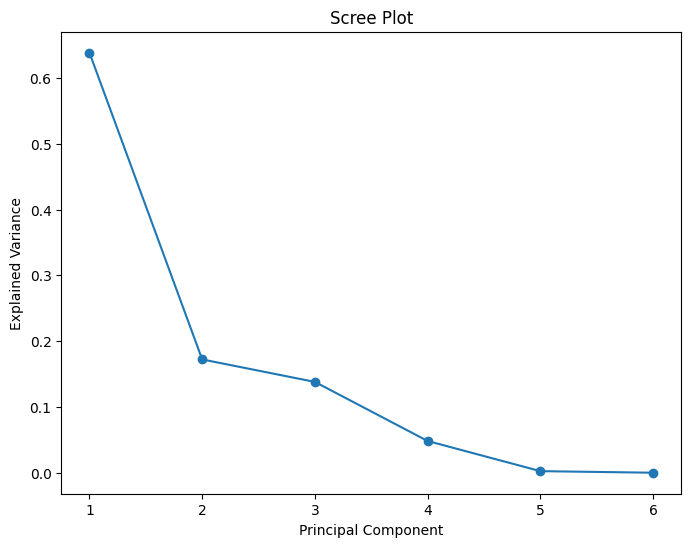

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
explained_variances = sorted_eigenvalues / np.sum(sorted_eigenvalues)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(sorted_eigenvalues) + 1), explained_variances, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.show()



In [ ]:
from sklearn.decomposition import PCA
num_components = 2
pca = PCA(n_components=num_components)
x_pca = pca.fit_transform(scaledata)
x_pca_df=pd.DataFrame(x_pca)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance_ratio)


Explained Variance Ratio:
 [0.63821889 0.17232665]


In [ ]:
final_data = pd.concat([x_pca_df, y], axis=1)
final_data


,0,1,diagnosis
0,1.975685,2.347307,0
1,3.040234,-0.655771,0
2,3.139635,0.527335,0
3,0.065299,2.991945,0
4,2.985922,0.689833,0
...,...,...,...
564,4.110948,0.394715,0
565,3.560401,-0.994950,0
566,1.880783,-1.636461,0
567,4.086983,0.096355,0


In [ ]:
xf=final_data.iloc[:,:-1]
xf
yf=final_data.iloc[:,-1]
yf
x_train,x_test,y_train,y_test=train_test_split(xf,yf,test_size=0.2,random_state=0)
x_train

,0,1
338,-2.003093,0.527109
427,-1.633685,-0.774889
406,0.148392,0.233900
96,-1.175806,0.649954
490,-1.128507,-1.255321
...,...,...
277,2.401572,-0.542699
9,0.410892,1.073255
359,-2.183578,0.473444
192,-2.452825,-1.456499


In [ ]:
model = LogisticRegression(max_iter = 4000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
spec = cm[0][0]/(cm[0][0]+cm[0][1])
print('accuracy score :-',accuracy_score(y_test,y_pred))
print('recall score :-',recall_score(y_test,y_pred,average="micro"))
print('specification:- ',spec)
print('precision score:-',precision_score(y_test,y_pred,average="micro"))
print('f1 score:-',f1_score(y_test,y_pred,average="micro"))
print('kappa score:-',cohen_kappa_score(y_test,y_pred))

accuracy score :- 0.9912280701754386
recall score :- 0.9912280701754386
specification:-  0.9787234042553191
precision score:- 0.9912280701754386
f1 score:- 0.9912280701754386
kappa score:- 0.9818413507486461


In [ ]:
#SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(4)

In [ ]:
x_svd = svd.fit_transform(x)
x_train_svd,x_test_svd,y_train,y_test = train_test_split(x_svd,yf,test_size=0.2,random_state=30)

In [ ]:
model.fit(x_train_svd,y_train)
y_svd_pred = model.predict(x_test_svd)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
spec = cm[0][0]/cm[0][0]+cm[0][1]
print('accuracy score :-',accuracy_score(y_test,y_svd_pred))
print('recall score :-',recall_score(y_test,y_svd_pred,average="micro"))
print('specification:- ',spec)
print('precision score:-',precision_score(y_test,y_svd_pred,average="micro"))
print('f1 score:-',f1_score(y_test,y_svd_pred,average="micro"))
print('kappa score:-',cohen_kappa_score(y_test,y_svd_pred))

accuracy score :- 0.8771929824561403
recall score :- 0.8771929824561403
specification:-  29.0
precision score:- 0.8771929824561403
f1 score:- 0.8771929824561403
kappa score:- 0.7387033398821219


In [ ]:
#LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
n_classes = len(np.unique(y))
n_components = min(19, n_classes - 1, x.shape[1])
lda = LinearDiscriminantAnalysis(n_components=n_components)

In [ ]:
x_lda = lda.fit_transform(x,y)
x_train_lda,x_test_lda,y_train,y_test = train_test_split(x_lda,y,test_size=0.2,random_state=0)

In [ ]:
model.fit(x_train_lda,y_train)
y_pred_lda = model.predict(x_test_lda)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
spec = cm[0][0]/(cm[0][0]+cm[0][1])
print('accuracy score :-',accuracy_score(y_test,y_pred_lda))
print('recall score :-',recall_score(y_test,y_pred_lda,average="micro"))
print('specification:- ',spec)
print('precision score:-',precision_score(y_test,y_pred_lda,average="micro"))
print('f1 score:-',f1_score(y_test,y_pred_lda,average="micro"))
print('kappa score:-',cohen_kappa_score(y_test,y_pred_lda))

accuracy score :- 0.9122807017543859
recall score :- 0.9122807017543859
specification:-  0.9787234042553191
precision score:- 0.9122807017543859
f1 score:- 0.9122807017543859
kappa score:- 0.8201325339223731
